In [8]:
# Based on:
# http://olumideokubadejo.blogspot.com.au/2016/07/anisotropic-diffusion-2-implementation.html

import numpy as np  
import scipy.ndimage as sp  
import scipy.misc as sv  
from scipy.ndimage.filters import gaussian_filter as gaussian  
import matplotlib.pyplot as plt

import paleogeography as pg

%matplotlib inline


def forwardDifferenceGradient(img):  
    diffY = np.zeros_like(img)  
    diffX = np.zeros_like(img)  
    diffY[:-1, :] = np.diff(img, axis = 0)  
    diffX[:, :-1] = np.diff(img, axis = 1)  
    return diffY, diffX 

def sigmoidFormula(gradientY, gradientX, k):  
    cGradientY = np.exp(-(gradientY/k) **2.)  
    cGradientX = np.exp(-(gradientX/k) **2.)  
    YVal = cGradientY * gradientY  
    XVal = cGradientX * gradientX  
    return YVal, XVal  

def tanhFormula(gradientY, gradientX, k):  
    cGradientY = 1./(1. + ((gradientY/k)**2))  
    cGradientX = 1./(1. + ((gradientX/k)**2))  
    YVal = cGradientY * gradientY  
    XVal = cGradientX * gradientX  
    return YVal, XVal 



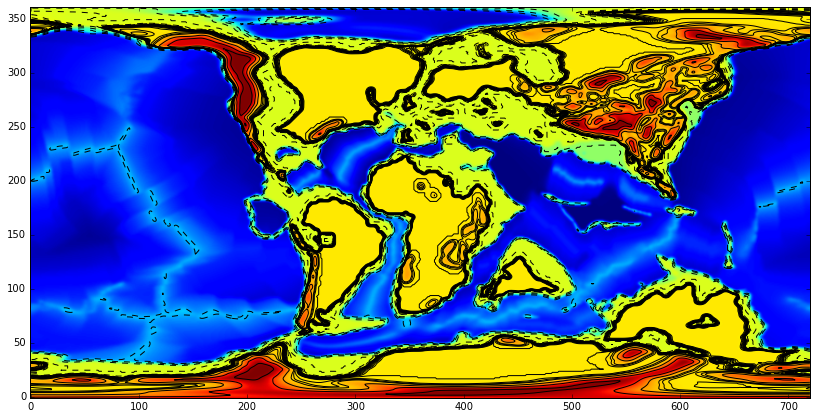

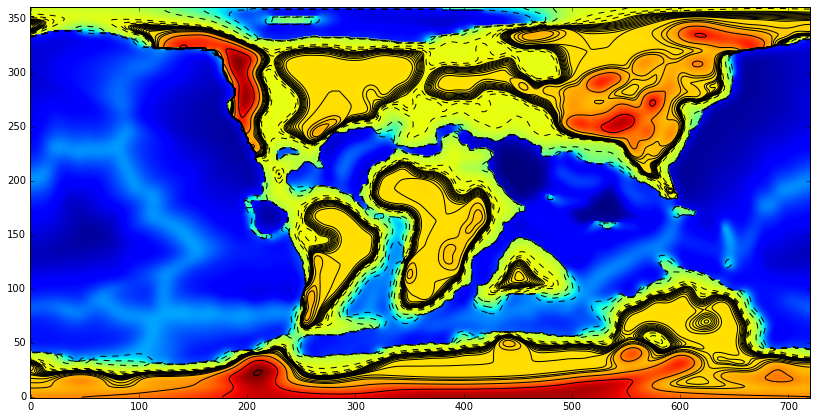

In [73]:
topo_smoothX,topo_smoothY,topo_smoothZ = pg.load_netcdf('../paleogeography/paleotopo_grids/paleotopobathy_smooth_101.50Ma.nc')

#img = sp.imread("fruits.jpg", mode = "L")  
#img = img.astype("float32")  

img = topo_smoothZ.astype("float32")

gauss = gaussian(img, 1)  

shiftedY = np.zeros_like(img)  
shiftedX = np.zeros_like(img)  
for i in range(50):  
    dY, dX = forwardDifferenceGradient(img)  
    cY, cX = sigmoidFormula(dY, dX, 1000)  
    #cY, cX = tanhFormula(dY, dX, 1000)  
    shiftedY[:] = cY  
    shiftedX[:] = cX  
    shiftedY[1:,:] -= cY[:-1,:]  
    shiftedX[:,1:] -= cX[:,:-1]  
    img += 0.25*(shiftedY+shiftedX)  

#sv.imsave('anisotropic.jpg', img)  
#sv.imsave('gaussian.jpg', gauss) 

plt.figure(figsize=(16,7))
plt.imshow(topo_smoothZ,origin='lower') #,vmin=-1000,vmax=500)
plt.contour(topo_smoothZ,[-3000,-2000,-1000,-200,-100,-50,0,20,40,60,80,100,120,140,160,180,200,300,400,500,1000,2000,3000],colors='k')
plt.show()

plt.figure(figsize=(16,7))
plt.imshow(img,origin='lower') #,vmin=-1000,vmax=500)
plt.contour(img,[-3000,-2000,-1000,-200,-100,-50,0,20,40,60,80,100,120,140,160,180,200,300,400,500,1000,2000,3000],colors='k')
plt.show()

#plt.figure(figsize=(16,7))
#plt.imshow(gauss,origin='lower',vmin=-250,vmax=250)
#plt.show()


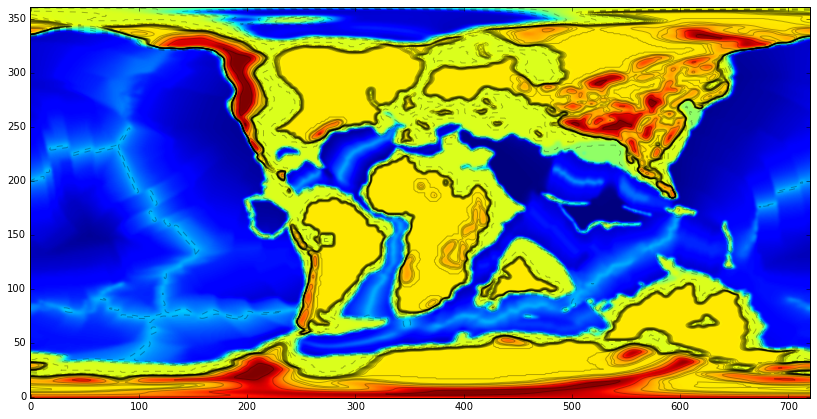

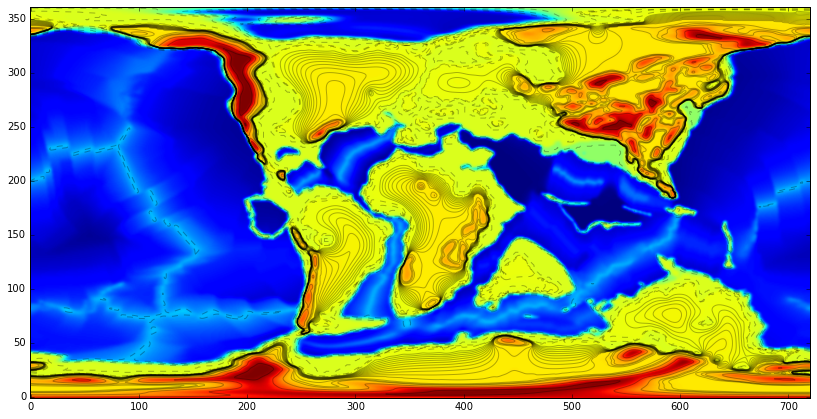

In [85]:
img = topo_smoothZ.astype("float32")

img_orig = np.copy(img)

#land_mask = img<0.
sea_regions = img<0.
mountain_regions = img>201.


gauss = gaussian(img, 1)  

shiftedY = np.zeros_like(img)  
shiftedX = np.zeros_like(img)  
for i in range(500):  
    dY, dX = forwardDifferenceGradient(img)  
    cY, cX = sigmoidFormula(dY, dX, 1000)  
    #cY, cX = tanhFormula(dY, dX, 1000)  
    shiftedY[:] = cY  
    shiftedX[:] = cX  
    shiftedY[1:,:] -= cY[:-1,:]  
    shiftedX[:,1:] -= cX[:,:-1]  
    img += 0.25*(shiftedY+shiftedX)  
    
    img[sea_regions] = img_orig[sea_regions]
    img[mountain_regions] = img_orig[mountain_regions]

#sv.imsave('anisotropic.jpg', img)  
#sv.imsave('gaussian.jpg', gauss) 

plt.figure(figsize=(16,7))
plt.imshow(topo_smoothZ,origin='lower') #,vmin=-1000,vmax=500)
plt.contour(topo_smoothZ,
            [-3000,-2000,-1000,-200,-100,-50,0,20,40,60,80,100,120,140,160,180,200,300,400,500,1000,2000,3000],
            alpha=0.3,colors='k')
plt.show()

plt.figure(figsize=(16,7))
plt.imshow(img,origin='lower') #,vmin=-1000,vmax=500)
plt.contour(img,
            [-3000,-2000,-1000,-200,-100,-50,0,20,40,60,80,100,120,140,160,180,200,300,400,500,1000,2000,3000],
            alpha=0.3,colors='k')
plt.show()

